## Phase I Project Proposal
### Stock Market Predictor

#### Name: Diego Cicotoste, DS 3000


# Introduction 

How does the stock market work? how can you predict the stock market? what tools can you use? The project aims to be able to have an educated prediction based on past historical stock price. We will be using the Yahoo Finance API. The results will be visualized throught graphs to better understand the trends of the stock market.


# Data Collection 

- Retrive historical data and trends from Yahoo Finance
- Process the data through a simple machine learning
- Develop a pediction and use **Linear Regression** to display it

## Tools being used
- Python Libraries
    - yfinance
    - pandas
    - mathplotlib
    - scikit-learn
- API
    - Yahoo Finance

## Showing Amazon stock prcie

[*********************100%***********************]  1 of 1 completed


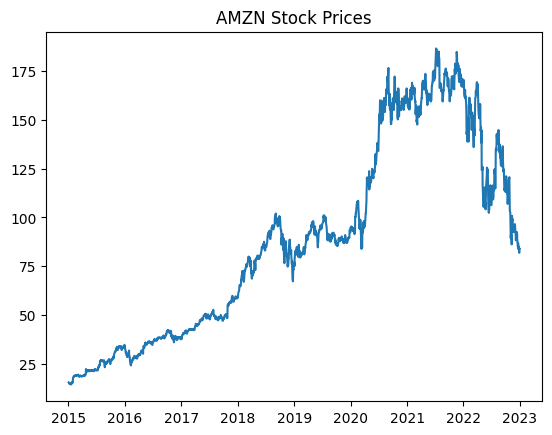

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Getting the data from AMZN 
stock_data = yf.download('AMZN', start="2015-01-01", end="2023-01-01")

# Plotting the data in a graph
plt.plot(stock_data.index, stock_data['Close'])
plt.title('AMZN Stock Prices')
plt.show()


# Predicting the stock market

To predict the stock price there are various points to keep an eye out for

1. Getting the price

*stock_data = yf.download(ticker, start="2015-01-01", end="2023-01-01")*

The purpose of this code is to dowload the code from January 2015 till January 2023. This data will give us an table contaning: Date, Open (the stock price when the market open), High (highest price it reached), Low (lowest price it reached), Adj Close (market closing price), Volume (total number of shares)

2. Processing the data

*stock_data['Date'] = stock_data.index*

*stock_data['Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)*

*stock_data = stock_data[['Date', 'Close']]*

From the table we are retreving the date colum that is created and placing it an index representing the dates, by using *pd.Timestamp.toordinal* in the end the data should only be 2 columns "Date" in YEAR-MONTH-DATE format amd "Close" 

3. Train-Test Split




[*********************100%***********************]  1 of 1 completed


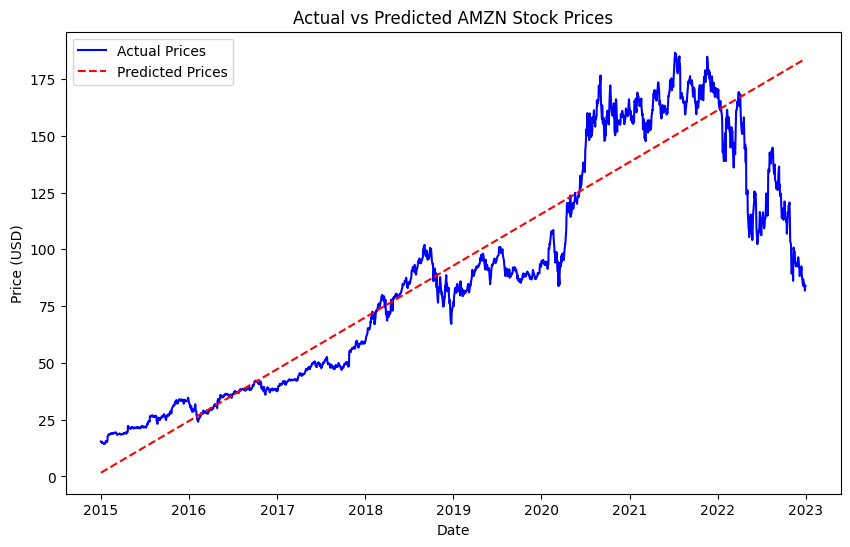

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Getting stock data using yfinance
ticker = 'AMZN'  
stock_data = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# Preprocess the data
stock_data['Date'] = stock_data.index
stock_data['Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)  
stock_data = stock_data[['Date', 'Close']]  

# Train-test split 
X = stock_data[['Date']] 
y = stock_data['Close']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the Linear Regression 
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for all the data
all_predictions = model.predict(X)

# Step 7: Plot actual vs predicted prices
plt.figure(figsize=(10,6))

# Plot actual prices
plt.plot(stock_data.index, stock_data['Close'], label='Actual Prices', color='blue')

# Plot predicted prices 
plt.plot(stock_data.index, all_predictions, label='Predicted Prices', color='red', linestyle='--')

plt.title(f'Actual vs Predicted {ticker} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
